In [2]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [9]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05

# if funnel_config.model.reference_process_key == "oudstl":
#     funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "funnel")
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "linear"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1 # 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [10]:
funnel_config.model.reference_process_key 

'oudstl'

In [11]:
funnel_config.model.input_dim

10

In [12]:
funnel_config.model.step_scheme_key

'cos_sq'

In [13]:
funnel_config.model.ts.shape

(128,)

In [14]:
# funnel_config.trainer.epochs = 2000
out_dict = train_dds(funnel_config)

('epoch: %s %s  loss: %s', 0, 'TRAIN', 2.9365768432617188)
('epoch: %s %s  loss: %s', 100, 'TRAIN', 1.9452086687088013)
('epoch: %s %s  loss: %s', 200, 'TRAIN', 1.7220619916915894)
('epoch: %s %s  loss: %s', 300, 'TRAIN', 1.6310051679611206)
('epoch: %s %s  loss: %s', 400, 'TRAIN', 1.5612361431121826)
('epoch: %s %s  loss: %s', 500, 'TRAIN', 1.694536805152893)
('epoch: %s %s  loss: %s', 600, 'TRAIN', 1.575049877166748)
('epoch: %s %s  loss: %s', 700, 'TRAIN', 1.585673451423645)
('epoch: %s %s  loss: %s', 800, 'TRAIN', 1.5566277503967285)
('epoch: %s %s  loss: %s', 900, 'TRAIN', 1.5844440460205078)
('epoch: %s %s  loss: %s', 1000, 'TRAIN', 1.586408257484436)
('epoch: %s %s  loss: %s', 1100, 'TRAIN', 2.1104750633239746)
('epoch: %s %s  loss: %s', 1200, 'TRAIN', 1.462278127670288)
('epoch: %s %s  loss: %s', 1300, 'TRAIN', 1.410008192062378)
('epoch: %s %s  loss: %s', 1400, 'TRAIN', 1.4263496398925781)
('epoch: %s %s  loss: %s', 1500, 'TRAIN', 1.3722158670425415)
('epoch: %s %s  loss: %s',

elbo_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
elbo_results/loss,█▃▃▂▂▁▁▁▄▁▂▂▁▁▂▁▁▂▂▁▁▂▁▁▁▂▂▂▁▂▁▁▁▁▁▁▂▁▁▁
is_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
is_results/loss,▆▇▇█▆▇▇▆█▆█▆▇▇▇▆▇█▇▇▆▄▆▁▇█▇▆▇▇▇▆▇▇▇▆█▆▆▇
lr/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr/lr,█▇▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pf_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
pf_results/loss,███▇█▇▇▆▆▆▆▆▃▁▇▅▆▇▆▆▆▅▆▄▄▄▆▆▆▆▇▅▄▆▆▅▆▆▆▇
elbo_results/epoch,9900
elbo_results/loss,1.4348
is_results/epoch,9900


KeyboardInterrupt: 

In [23]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [24]:
onp.mean(out_dict[-1]["is_eval"])

0.1783364772796631

In [25]:
onp.mean(out_dict[-1]["pf_eval"])

-29.27871119181315

In [12]:
out_dict[-1]["pf_eval"]

[-26.153297424316406,
 -32.977294921875,
 -32.87266540527344,
 -29.588817596435547,
 -33.623817443847656,
 -29.697425842285156,
 -27.014232635498047,
 -27.44237518310547,
 -23.68344497680664,
 -28.254627227783203,
 -34.311161041259766,
 -26.757247924804688,
 -28.34442901611328,
 -22.405651092529297,
 -31.151779174804688,
 -23.549104690551758,
 -27.946117401123047,
 -31.678722381591797,
 -31.535213470458984,
 -28.132266998291016,
 -22.659343719482422,
 -25.918323516845703,
 -33.20878982543945,
 -32.32448196411133,
 -25.301029205322266,
 -38.871665954589844,
 -24.329633712768555,
 -32.61470031738281,
 -29.437786102294922,
 -36.575889587402344]

In [13]:
funnel_config.model.reference_process_key

'oudstl'

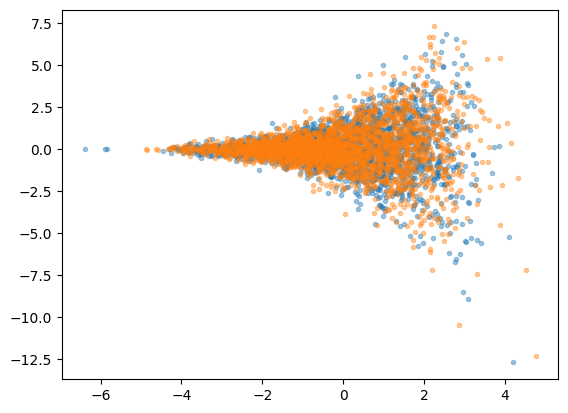

In [14]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

In [1]:
import matplotlib.pyplot as plt

timestep = 40

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

NameError: name 'out_dict' is not defined

In [16]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [17]:
cake

DeviceArray(-34.436146, dtype=float32)

In [18]:
funnel_config.model.target(out_dict[-1]["aug_ode"][:, -1,:10]).mean()

DeviceArray(-13.986603, dtype=float32)

In [19]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

DeviceArray(-14.966006, dtype=float32)

In [20]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(10) , funnel_config.model.sigma * np.ones(10))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

DeviceArray(-14.966006, dtype=float32)

In [21]:
funnel_config

{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x7f74cfb72830>, 'activation_dict': {'gelu': <function gelu at 0x7f74cfb72830>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x7f752e740df0>, 'swish': <CompiledFunction of <function silu at 0x7f752e54c3a0>>}, 'activation_key': 'gelu', 'alpha': 0.6875, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': False, 'fully_connected_units': [64, 64], 'input_dim': 10, 'learn_betas': False, 'log': False, 'm': 1.0, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'reference_process_dict': {'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.udp_samplers.AugmentedOUDFollmerSDEUDP'>, 'oustl': <class 'dds.stl_